In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [5]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import LeakyReLU,PReLU,ELU
# from keras.layers import Dropout

In [11]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [12]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5691 - accuracy: 0.7697 - val_loss: 0.5177 - val_accuracy: 0.7963
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5008 - accuracy: 0.7977 - val_loss: 0.4954 - val_accuracy: 0.7974
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4851 - accuracy: 0.7987 - val_loss: 0.4856 - val_accuracy: 0.7986
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4755 - accuracy: 0.7996 - val_loss: 0.4779 - val_accuracy: 0.7993
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.8016 - val_loss: 0.4709 - val_accuracy: 0.8016
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4594 - accuracy: 0.8041 - val_loss: 0.4647 - val_accuracy: 0.8016
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4525 - accuracy: 0.8061 - val_loss: 0.4592 - val_accuracy: 0.8031

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3492 - accuracy: 0.8530 - val_loss: 0.3669 - val_accuracy: 0.8493
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8545 - val_loss: 0.3667 - val_accuracy: 0.8508
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3483 - accuracy: 0.8543 - val_loss: 0.3665 - val_accuracy: 0.8516
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8539 - val_loss: 0.3663 - val_accuracy: 0.8516
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8535 - val_loss: 0.3662 - val_accuracy: 0.8527
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.8548 - val_loss: 0.3660 - val_accuracy: 0.8519
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3464 - accuracy: 0.8554 - val_loss: 0.3656 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


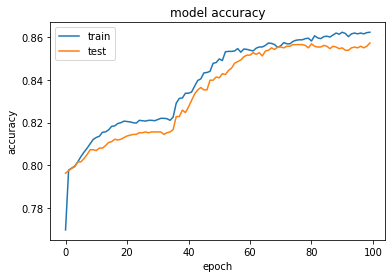

In [17]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


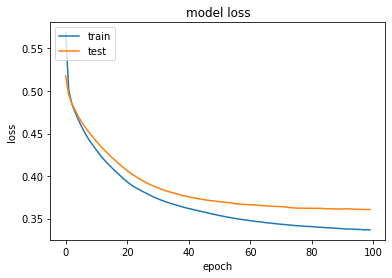

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


63/63 [==============================] - 0s 1ms/step


In [21]:
# complete